In [16]:
!git clone https://github.com/deepanrajm/machine_learning.git
!pip install catboost
!pip install lightgbm==3.3.5

# Importing essential libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error as mse
import xgboost as xg
import lightgbm as lgb
from sklearn.metrics import mean_squared_error as mse
from lightgbm import LGBMRegressor

fatal: destination path 'machine_learning' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [2]:
# Loading the dataset
df = pd.read_csv('/content/machine_learning/Regression/ipl.csv')
df.columns
df.shape
df.dtypes
df.head()
df.columns
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker',]

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))


Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [3]:
df.columns
df.index
df['bat_team'].unique()
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))
df['bat_team'].unique()

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [4]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))
# Converting the column 'date' from string into datetime object
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)
Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


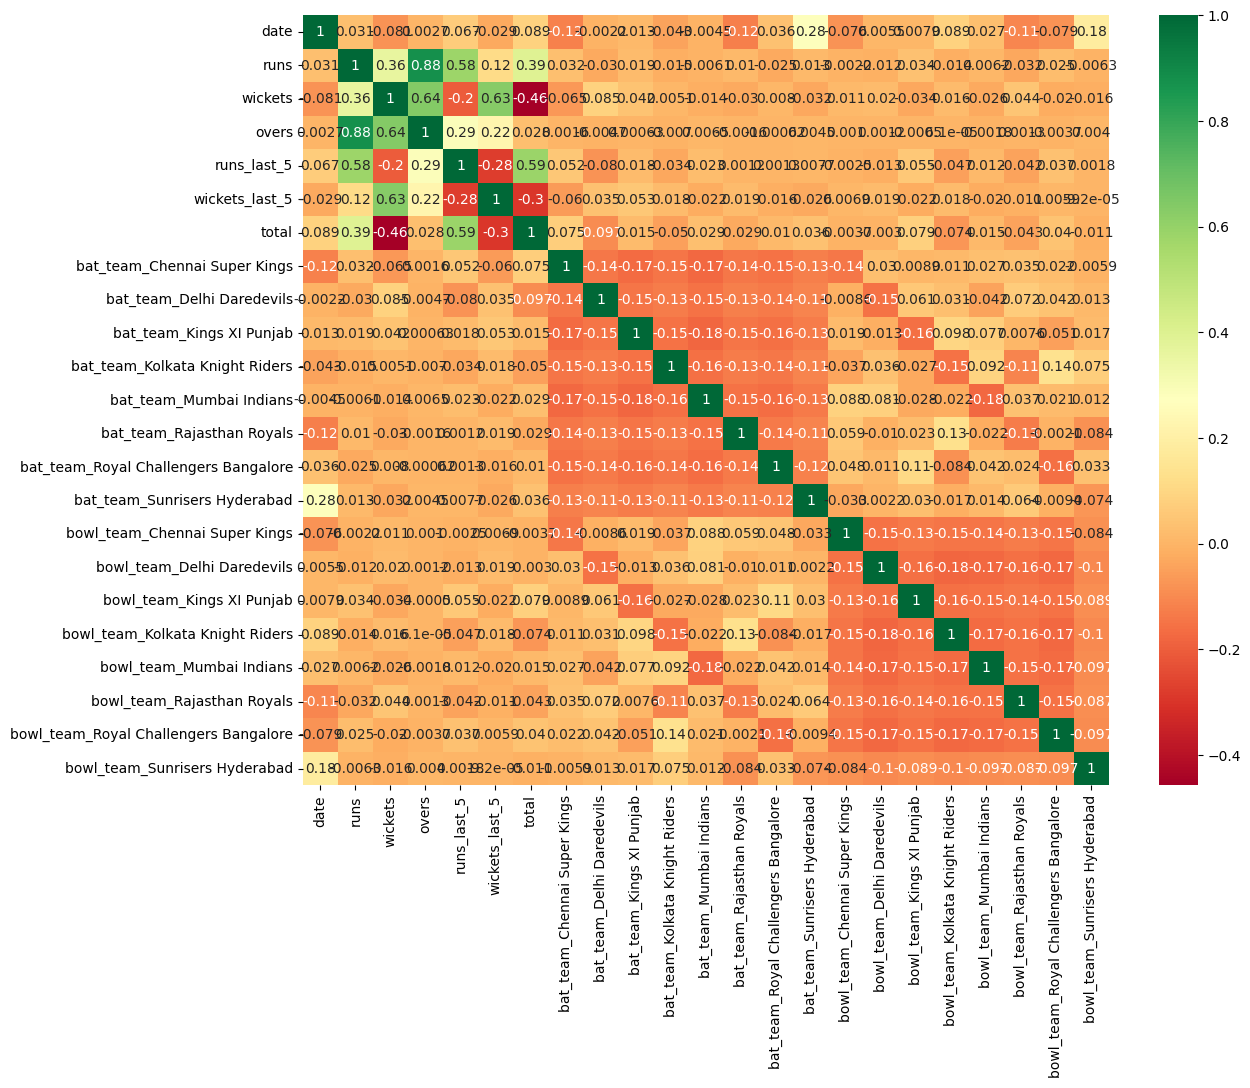

In [5]:
# columns_to_remove = ['bat_team','bowl_team']
# df.drop(labels=columns_to_remove, axis=1, inplace=True)

df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [6]:
# Converting categorical features using OneHotEncoding method
# encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
df.columns
df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [7]:
# Rearranging the columns
encoded_df = df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [8]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


In [9]:
# Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)
# Linear Regression - Model Evaluation
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193295
Mean Squared Error (MSE): 251.0079231041744
Root Mean Squared Error (RMSE): 15.843229566732106


In [10]:
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)
y_pred_dt = decision_regressor.predict(X_test)
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.257739380849532
Mean Squared Error (MSE): 544.9445644348452
Root Mean Squared Error (RMSE): 23.34404773030687


In [11]:
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)
y_pred_rf = random_regressor.predict(X_test)
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.742970619493297
Mean Squared Error (MSE): 330.7339187687165
Root Mean Squared Error (RMSE): 18.18609135489857


In [12]:
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)
y_pred_adb = adb_regressor.predict(X_test)
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.146213306926969
Mean Squared Error (MSE): 247.94992008201777
Root Mean Squared Error (RMSE): 15.746425628758349


In [13]:
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred_gbr = reg.predict(X_test)
print("---- Gradient Boosting regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_gbr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_gbr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_gbr))))

---- Gradient Boosting regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.86788289314979
Mean Squared Error (MSE): 277.9532833779118
Root Mean Squared Error (RMSE): 16.67193100327349


In [14]:
model = CatBoostRegressor(loss_function='RMSE')
model.fit(X_train, y_train)
y_pred_gbr = model.predict(X_test)
print("---- Gradient Boosting regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_gbr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_gbr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_gbr))))

Learning rate set to 0.072538
0:	learn: 28.5778496	total: 54.7ms	remaining: 54.6s
1:	learn: 27.6355927	total: 61.2ms	remaining: 30.5s
2:	learn: 26.8051123	total: 66.9ms	remaining: 22.2s
3:	learn: 26.0262629	total: 72.7ms	remaining: 18.1s
4:	learn: 25.3111367	total: 78.3ms	remaining: 15.6s
5:	learn: 24.6945835	total: 83.9ms	remaining: 13.9s
6:	learn: 24.1032346	total: 89.6ms	remaining: 12.7s
7:	learn: 23.5662436	total: 95.1ms	remaining: 11.8s
8:	learn: 23.1107449	total: 100ms	remaining: 11.1s
9:	learn: 22.6784291	total: 106ms	remaining: 10.5s
10:	learn: 22.2911560	total: 112ms	remaining: 10.1s
11:	learn: 21.9352197	total: 118ms	remaining: 9.68s
12:	learn: 21.6017748	total: 123ms	remaining: 9.36s
13:	learn: 21.3170444	total: 129ms	remaining: 9.08s
14:	learn: 21.0641834	total: 134ms	remaining: 8.82s
15:	learn: 20.8248345	total: 143ms	remaining: 8.79s
16:	learn: 20.6231688	total: 148ms	remaining: 8.58s
17:	learn: 20.4089028	total: 154ms	remaining: 8.41s
18:	learn: 20.2382169	total: 160ms	r

In [15]:
# reg = ensemble.GradientBoostingRegressor()
# reg.fit(X_train, y_train)
# y_pred_gbr = reg.predict(X_test)


xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
y_pred_gbr = xgb_r.predict(X_test)

print("---- XG Boost regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_gbr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_gbr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_gbr))))


---- XG Boost regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.615178687011191
Mean Squared Error (MSE): 294.7151579007127
Root Mean Squared Error (RMSE): 17.16726996061729


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [17]:
# Create an instance of the LightGBM Regressor with the RMSE metric.
model = LGBMRegressor(metric='rmse')

# Train the model using the training data.
model.fit(X_train, y_train)

# Make predictions on the training and validation data.
y_pred_gbr = model.predict(X_test)
print("---- XG Boost regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_gbr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_gbr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_gbr))))

---- XG Boost regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.945875222091612
Mean Squared Error (MSE): 277.6182922085903
Root Mean Squared Error (RMSE): 16.661881412631356


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data
print("---- Gradient Boosting regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, X_test)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, X_test)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, X_test))))